# UNSUPERVISED BOUNDING BOXES FOR BINARY IMAGES

## Importing the images
The inpute are binary images:

+ black = background
+ white = anomalies

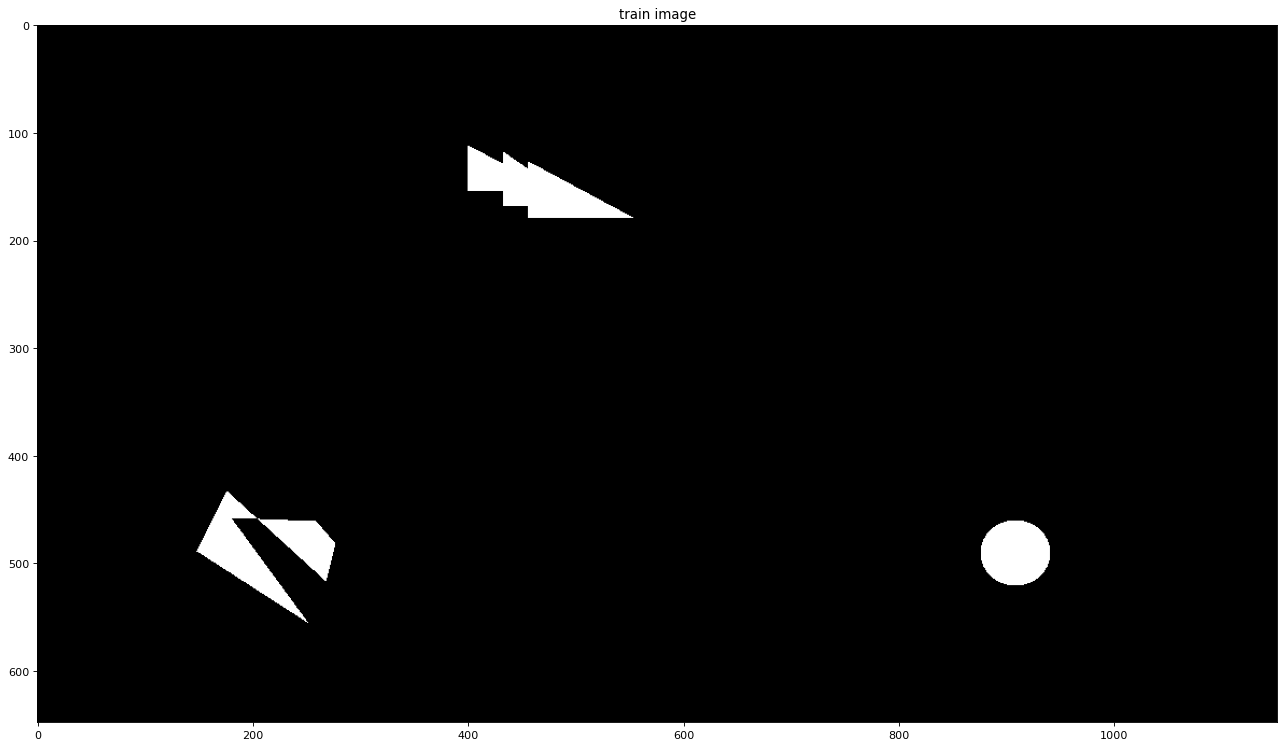

In [18]:
import matplotlib.pyplot as plt
import cv2
from utils import compute_IoU
import evaluate
import numpy as np
# import matplotlib.image as mpimg

# UPLOAD A RANDOM PICTURE
img_train_path = "train_binary_image.png"
img_val_path = "validation_binary_image.png"

# Display the images
img_t = cv2.imread(img_train_path)
img_v = cv2.imread(img_val_path)

rgb_t = cv2.cvtColor(img_t, cv2.COLOR_BGR2RGB)
# rgb_v = cv2.cvtColor(img_v, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 18), dpi=80)
plt.imshow(rgb_t)
plt.title('train image')
plt.show()

# plt.figure(figsize=(20, 18), dpi=80)
# plt.imshow(rgb_v)
# plt.title('validation image')
# plt.show()

## Object detection + Bounding box 

Box coordinates for detected objects (x,y,w,h): [(877, 461, 64, 60), (205, 459, 72, 58), (148, 434, 104, 122), (400, 113, 154, 67)]


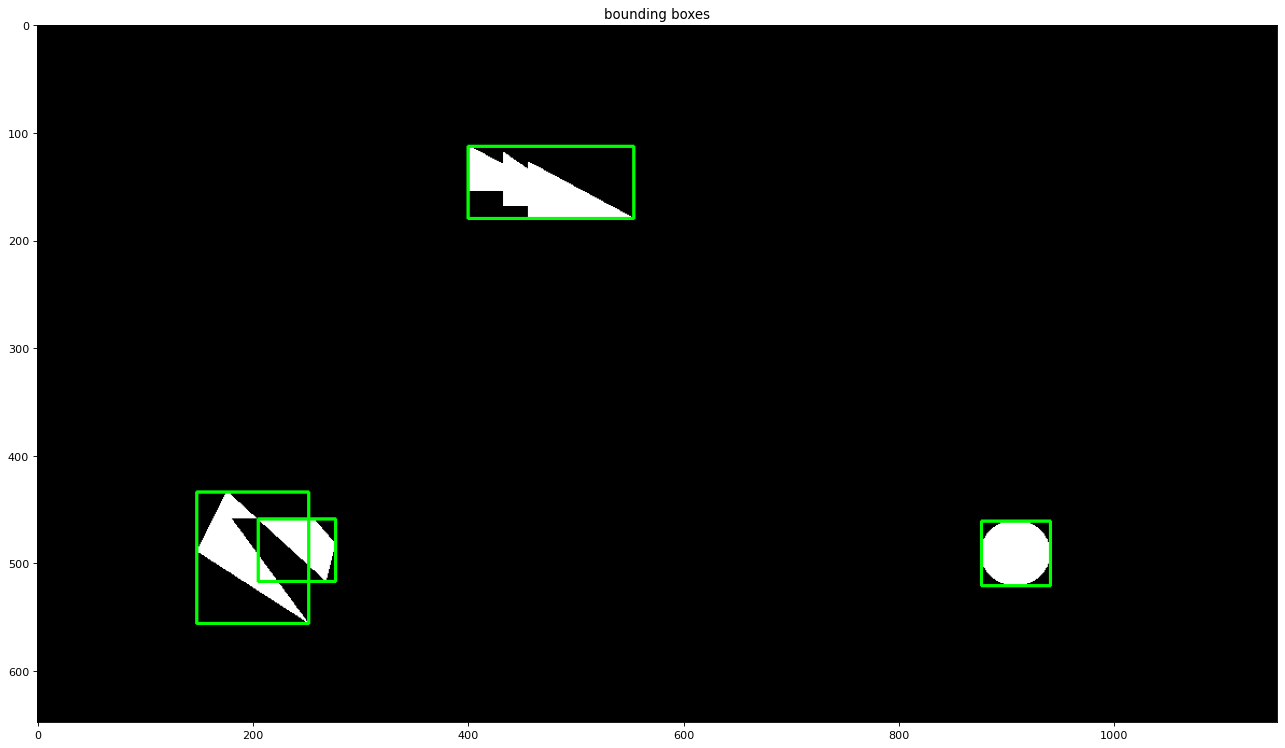

In [11]:
img_t_bb = img_t.copy()
# convert to grayscale
gray = cv2.cvtColor(img_t_bb,cv2.COLOR_BGR2GRAY)

# threshold
thresh = cv2.threshold(gray,128,255,cv2.THRESH_BINARY)[1]

# get contours
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
detected_boxes = []
for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    detected_boxes.append((x,y,w,h))
    cv2.rectangle(img_t_bb, (x, y), (x+w, y+h), (0, 255, 0), 2)
#     print("x,y,w,h:",x,y,w,h)
 
print('Box coordinates for detected objects (x,y,w,h):', detected_boxes)
  

rgb_t_bb =  cv2.cvtColor(img_t_bb, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 18), dpi=80)
plt.imshow(rgb_t_bb)
plt.title('bounding boxes')
plt.show()

### Obtaining validation bounding boxes
Obtain testing bounding boxes, by mouse clicking. Click on the upper-left corner and the on the bottom-right corner of the drawn red box.

In [12]:
#This variable we use to store the pixel location
refPt = []
def click_event(event, x, y, flags, params):
    '''
    Left Click to get the x, y coordinates.
    Right Click to get BGR color scheme at that position.
    '''
    text = ''
    font = cv2.FONT_HERSHEY_COMPLEX
    color = (255, 0, 0)
    if event == cv2.EVENT_LBUTTONDOWN:
        refPt.append([x,y])
        print(x, ",", y)
        text = str(x) + "," + str(y)
        color = (0, 255, 0)
    elif event == cv2.EVENT_RBUTTONDOWN:
        refPt.append([x,y])
        b = img[y, x, 0]
        g = img[y, x, 1]
        r = img[y, x, 2]
        text = str(b) + ',' + str(g) + ',' + str(r)
        color = (0, 0, 255)
    cv2.putText(img_v_box, text, (x, y), font, 0.5, color, 1, cv2.LINE_AA)
    cv2.imshow('Click upper-lef/right-bottom corner of boxes', img_v_box)
    
img_v_box = img_v.copy() # Opening again for not writing in the original picture

cv2.imshow("Click upper-lef/right-bottom corner of boxes", img_v_box)
#calling the mouse click event
cv2.setMouseCallback("Click upper-lef/right-bottom corner of boxes", click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

395 , 112
558 , 183
145 , 433
279 , 559
873 , 461
941 , 524


In [13]:
def convert_bbox(box):
    """ Converts (x1,y1,x2,y2) -> (x,y,w,h).
        - box: tuple
            box coordinates in (x1,y1,x2,y2)"""
    x, y = box[0], box[1]
    w = box[2] - box[0]
    h = box[3] - box[1]
    return (x,y,w,h)

In [14]:
print('Check for storing:',refPt)

# Store the coordinates in (x,y,w,h) format
validation_boxes  = []
for i in range(0,len(refPt),2):
    x1, y1 = refPt[i]
    x2, y2 = refPt[i+1]
    x, y, w, h = convert_bbox((x1, y1, x2, y2))# Convert the coordinates format
    validation_boxes.append((x, y, w, h))
print('Validation bounding boxes:', validation_boxes)
print('Detected bounding boxes:', detected_boxes)


Check for storing: [[395, 112], [558, 183], [145, 433], [279, 559], [873, 461], [941, 524]]
Validation bounding boxes: [(395, 112, 163, 71), (145, 433, 134, 126), (873, 461, 68, 63)]
Detected bounding boxes: [(877, 461, 64, 60), (205, 459, 72, 58), (148, 434, 104, 122), (400, 113, 154, 67)]


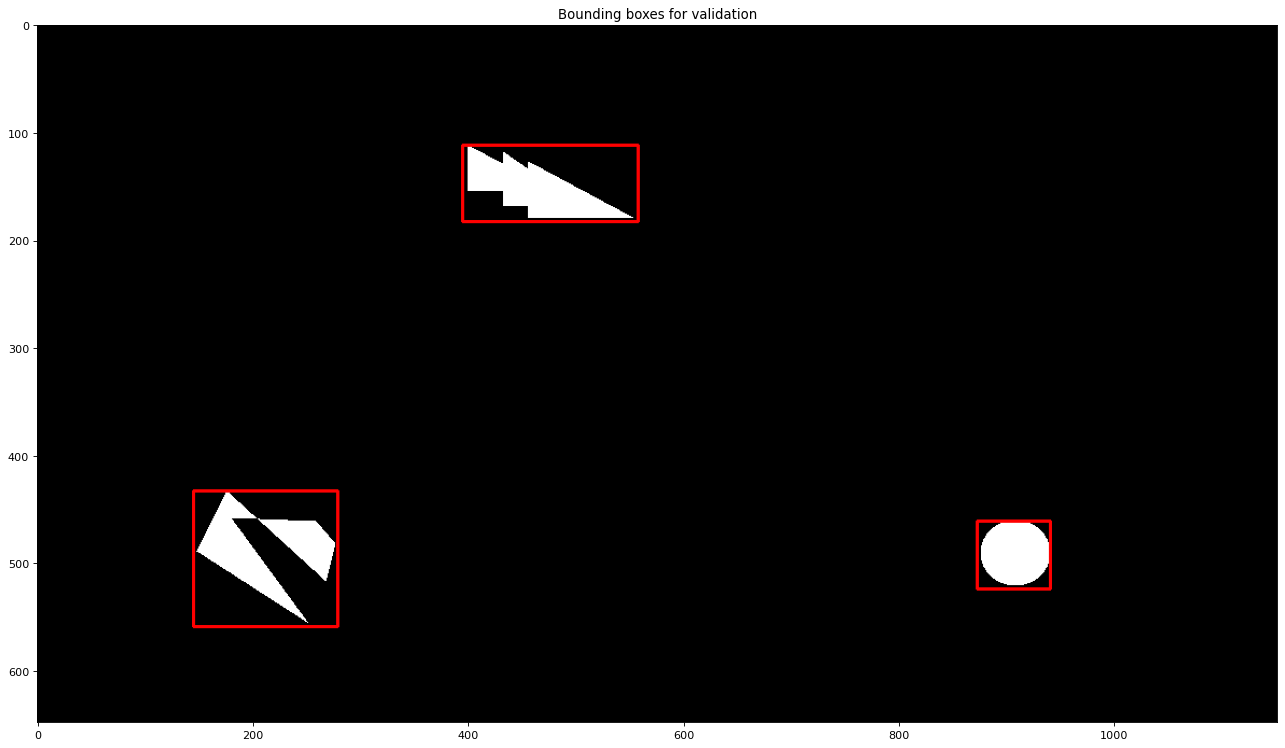

In [15]:
# Draw clicked boxes
img_val_box = img_t.copy()
for box in validation_boxes:
    x,y,w,h = box
    cv2.rectangle(img_val_box, (x, y), (x+w, y+h), (0, 0, 255), 2)

rgb_val_box =  cv2.cvtColor(img_val_box, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 18), dpi=80)
plt.imshow(rgb_val_box)
plt.title('Bounding boxes for validation')
plt.show()

Reorder the boxes lists sorted by their (x,y) values


In [16]:
validation_boxes_order = sorted(validation_boxes , key=lambda k: [k[1], k[0]])
detected_boxes_order = sorted(detected_boxes , key=lambda k: [k[1], k[0]])

print('Ordered detected boxes:', detected_boxes_order)
print('Ordered validation box:', validation_boxes_order)

Ordered detected boxes: [(400, 113, 154, 67), (148, 434, 104, 122), (205, 459, 72, 58), (877, 461, 64, 60)]
Ordered validation box: [(395, 112, 163, 71), (145, 433, 134, 126), (873, 461, 68, 63)]


## Calculate IoU
We are using compute_IoU() from utils


[[0.89155794 0.         0.        ]
 [0.         0.75148069 0.        ]
 [0.         0.24733475 0.        ]
 [0.         0.         0.89635854]]
0
1
2
3


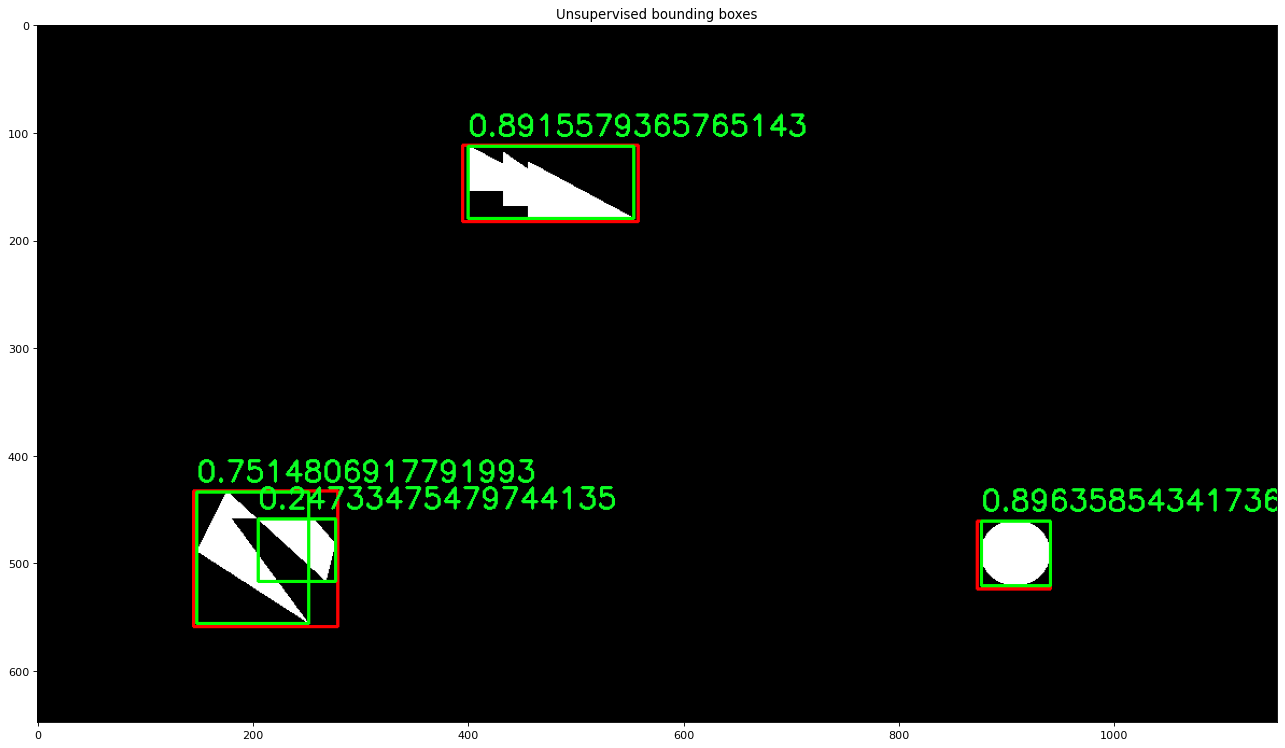

[0. 0. 0. 0.]


In [24]:
iou_scores = compute_IoU(detected_boxes_order, validation_boxes_order)
print(iou_scores)

# Draw the all boxes an their respective IoU value

result_final = img_val_box.copy()
for pos, row in enumerate(iou_scores):
    print(pos)
    # IoU value = Index of non zero element in the row
    iou = max(row[np.nonzero(row)]) #There might be validation boxes that overlay, so we are considering the greatest value
    box_d = detected_boxes_order[pos]
    x,y,w,h = box_d
    cv2.rectangle(result_final, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(result_final, str(iou), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    
rgb_final =  cv2.cvtColor(result_final, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 18), dpi=80)
plt.imshow(rgb_final)
plt.title('Unsupervised bounding boxes')
plt.show()

print(np.zeros(iou_scores.shape[0]))